In [15]:
import numpy as np
import matplotlib
import pandas as pd
%matplotlib inline
from scipy.optimize import minimize

#Media movil ponderada
def WMA(data,pesos):
    n = len(pesos)
    data_aux=np.array (list(data))
    data_len=len(data_aux)
    wma_res=[ ]
    for i in range (0,data_len):
        if i<n:
            wma_res.append(np.nan)
        else:
            suma_aux=0
            for j in range (1,n+1):
                suma_aux+=pesos[j-1]*data_aux[i-j]
            wma_res.append(suma_aux)
    return wma_res.copy()

#Definimos MADn
def MADn(data,pred,n):
    aux=0
    j=0
    while np.isnan(pred[j]):
        j+=1
    for i in range (j,n+j): 
        aux+=abs(data[i]-pred[i])
    resultado=aux/n
    return resultado

#Definimos una función para calcular los pesos
#óptimos de la MMP

def MADwma(pesos,x):
    y=WMA(x,pesos)
    res=MADn(x,y,len(y)-len(pesos))
    return res

#Definimos la restricción de los pesos
def con(pesos):
    return sum(pesos) - 1

cons = [{'type':'eq','fun': con}]

# Definimos la función para obtener el pronóstico mediante MMP de 
# n períodos de los datos con pesos óptimos

def MMP(data,n):
    
    guess = []
    for i in range(n):
        guess.append(1/n)
    result_wma=minimize(MADwma,guess,(data,),
                       bounds = [(0,1),(0,1),(0,1)],
                       constraints = cons, method = 'SLSQP')
    resultado = WMA(data,result_wma.x)
    return resultado
        
data = [110,134,162,180,118,109,114,173,154,132]
pred_wma = MMP(data,3)
df= pd.DataFrame()
df['data']=data
df['pred_wma']=pred_wma

df

,data,pred_wma
0,110,NaN
1,134,NaN
2,162,NaN
3,180,158.337977
4,118,176.760519
5,109,121.098634
6,114,114.000069
7,173,114.281694
8,154,168.492895
9,132,151.183060


<AxesSubplot:>

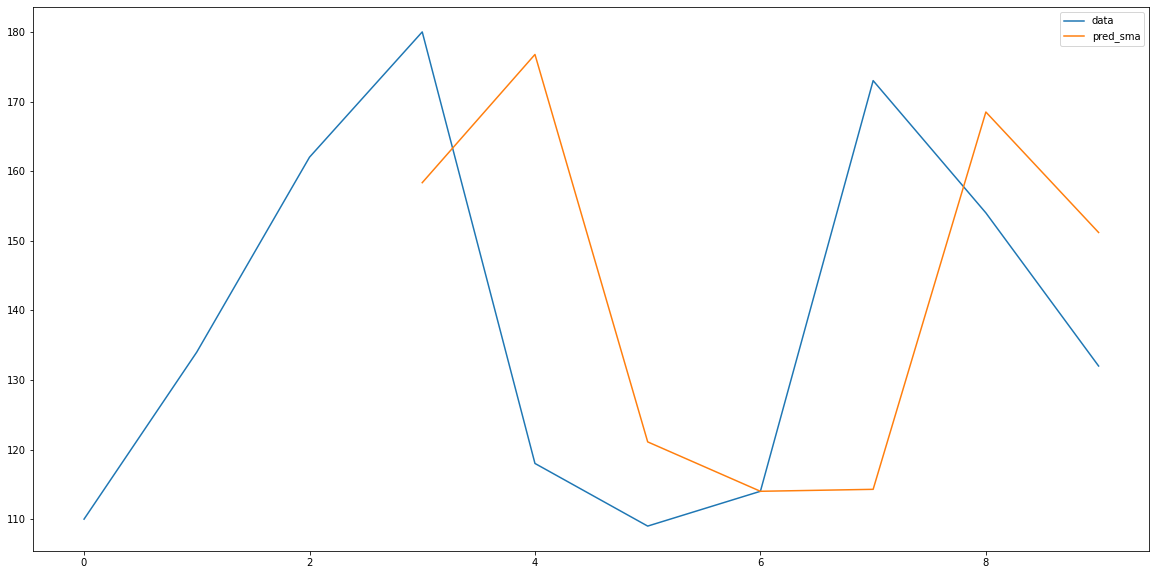

In [13]:
#Gráfico
df[['data','pred_wma',]].plot(figsize=(20,10))

In [16]:
#MAD
MADn(data,pred_wma,7)

26.416500805347965

In [18]:
#TS
def TSn(data,pred,n,m):
    aux=0
    aux2=0
    j=0
    while np.isnan(pred[j]):
        j+=1
    for i in range(j,n):
        aux+= data[i]-pred[i]
        aux2+= abs(data[i] - pred[i])
    resultado=(n-m)*(aux/aux2)
    return resultado
    
TSn(data,pred_wma,10,3)

-0.914384868783293